## Analysis of spam SMS messages (data from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/))

In [76]:
import seaborn as sns

In [ ]:
!

In [80]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv('data/SMSSpamCollection',sep='\t',header=None,names=['class','text'])

In [21]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [68]:
df['text_len'] = df['text'].apply(len)

In [70]:
df.head()

,class,text,text_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


In [72]:
pd.set_option('display.max_colwidth', 500)

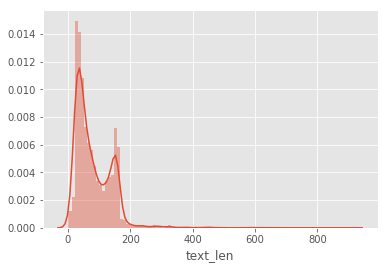

In [116]:
sns.distplot(df.text_len,bins='auto')

## Split into test data and training data

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.25)

## Some Pre-processing

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

In [85]:
count_vect = CountVectorizer()

In [86]:
X_train_counts = count_vect.fit_transform(X_train)

In [87]:
type(count_vect.vocabulary_)

dict

In [88]:
A = count_vect.vocabulary_

In [89]:
max(A, key=A.get)


'〨ud'

In [90]:
sorted_d = sorted((key, value) for (key,value) in A.items())

In [91]:
sorted_d

[('00', 0),
 ('000', 1),
 ('000pes', 2),
 ('008704050406', 3),
 ('0089', 4),
 ('0121', 5),
 ('01223585236', 6),
 ('01223585334', 7),
 ('0125698789', 8),
 ('02', 9),
 ('0207', 10),
 ('02072069400', 11),
 ('02073162414', 12),
 ('02085076972', 13),
 ('021', 14),
 ('03', 15),
 ('04', 16),
 ('0430', 17),
 ('05', 18),
 ('050703', 19),
 ('0578', 20),
 ('06', 21),
 ('07', 22),
 ('07008009200', 23),
 ('07090201529', 24),
 ('07090298926', 25),
 ('07099833605', 26),
 ('07123456789', 27),
 ('0721072', 28),
 ('07734396839', 29),
 ('07742676969', 30),
 ('0776xxxxxxx', 31),
 ('07781482378', 32),
 ('07786200117', 33),
 ('078', 34),
 ('07801543489', 35),
 ('07808247860', 36),
 ('07808726822', 37),
 ('07815296484', 38),
 ('078498', 39),
 ('07880867867', 40),
 ('0789xxxxxxx', 41),
 ('07946746291', 42),
 ('0796xxxxxx', 43),
 ('07xxxxxxxxx', 44),
 ('08', 45),
 ('0800', 46),
 ('08000407165', 47),
 ('08000776320', 48),
 ('08000839402', 49),
 ('08000930705', 50),
 ('08000938767', 51),
 ('08001950382', 52),
 (

In [48]:
sorted(A, key=A.get, reverse=True)


['〨ud',
 'ú1',
 'zyada',
 'zogtorius',
 'zoe',
 'zindgi',
 'zhong',
 'zeros',
 'zed',
 'zebra',
 'zealand',
 'zaher',
 'zac',
 'yup',
 'yuou',
 'yuo',
 'yunny',
 'yun',
 'yummy',
 'yummmm',
 'ything',
 'ystrday',
 'yrs',
 'yr',
 'yowifes',
 'yoville',
 'youwanna',
 'youuuuu',
 'yourself',
 'yours',
 'yourjob',
 'yourinclusive',
 'youre',
 'your',
 'youphone',
 'younger',
 'young',
 'youi',
 'you',
 'yor',
 'yogasana',
 'yoga',
 'yo',
 'ymca',
 'ym',
 'yijue',
 'yifeng',
 'yhl',
 'yetunde',
 'yetty',
 'yet',
 'yesterday',
 'yest',
 'yes',
 'yer',
 'yep',
 'yeovil',
 'yelow',
 'yelling',
 'yeh',
 'years',
 'year',
 'yeah',
 'yck',
 'yay',
 'yaxxx',
 'yaxx',
 'yavnt',
 'yards',
 'yarasu',
 'yar',
 'yan',
 'yalrigu',
 'yahoo',
 'yah',
 'ya',
 'y87',
 'xy',
 'xxxxxxxxxxxxxx',
 'xxxxxx',
 'xxxxx',
 'xxxx',
 'xxx',
 'xxuk',
 'xxsp',
 'xx',
 'xuhui',
 'xt',
 'xmas',
 'xin',
 'xchat',
 'xavier',
 'xam',
 'xafter',
 'x49',
 'x29',
 'x2',
 'wylie',
 'www',
 'wun',
 'wuldnt',
 'wud',
 'wtlp',
 'wt

In [19]:
#count_vect.vocabulary_.items()[0:3]
count_vect.vocabulary_.items()

dict_items([('hi', 3276), ('darlin', 2054), ('hope', 3338), ('you', 7398), ('had', 3144), ('nice', 4569), ('night', 4577), ('wish', 7240), ('come', 1799), ('cant', 1541), ('wait', 7070), ('to', 6653), ('see', 5738), ('love', 4046), ('fran', 2830), ('ps', 5244), ('want', 7090), ('dirty', 2223), ('anal', 892), ('sex', 5793), ('and', 894), ('10', 242), ('man', 4148), ('gang', 2927), ('bang', 1132), ('can', 1530), ('use', 6933), ('foreign', 2800), ('stamps', 6169), ('for', 2797), ('whatever', 7182), ('send', 5763), ('them', 6545), ('off', 4683), ('jus', 3702), ('its', 3592), ('true', 6772), ('that', 6536), ('missin', 4312), ('me', 4213), ('cos', 1910), ('really', 5372), ('him', 3287), ('haven', 3210), ('done', 2291), ('anything', 933), ('feel', 2664), ('guilty', 3128), ('about', 700), ('yet', 7386), ('400', 444), ('xmas', 7348), ('reward', 5535), ('is', 3572), ('waiting', 7072), ('our', 4798), ('computer', 1837), ('has', 3197), ('randomly', 5332), ('picked', 4982), ('from', 2872), ('loyal'

In [15]:
len(count_vect.vocabulary_)

7437

In [92]:
lab_bin=LabelBinarizer()
y_train_bin=lab_bin.fit_transform(y_train)
y_test_bin=lab_bin.fit_transform(y_test)

## Train

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
clf = MultinomialNB().fit(X_train_counts, y_train_bin)

/Users/franciscosalas/miniconda3/envs/nlp/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
len(clf.coef_[0])

7595

In [95]:
import collections

In [96]:
importanceCount=collections.Counter()

In [97]:
for word,imp in zip(count_vect.vocabulary_.keys(),clf.coef_[0]):
    importanceCount[word]=imp

In [100]:
importanceCount.most_common()[:10]

[('helping', -3.6904556491241847),
 ('m227xy', -4.351615154190733),
 ('club4', -4.525087095707705),
 ('chachi', -4.661770082494573),
 ('hut', -4.862440777956724),
 ('2stop', -4.881132910968876),
 ('art', -4.906611996269861),
 ('bstfrnd', -4.946090807243649),
 ('pt2', -4.959604526410372),
 ('memories', -5.082502662733526)]

In [98]:
importanceCount.most_common()[-10:]

[('pract', -9.950037113189108),
 ('flung', -9.950037113189108),
 ('rajas', -9.950037113189108),
 ('burrito', -9.950037113189108),
 ('grocers', -9.950037113189108),
 ('hcl', -9.950037113189108),
 ('requires', -9.950037113189108),
 ('suman', -9.950037113189108),
 ('telephonic', -9.950037113189108),
 ('profiles', -9.950037113189108)]

## Now test

In [101]:
X_test_counts = count_vect.transform(X_test)

In [102]:
pred=clf.predict(X_test_counts)

In [103]:
from sklearn.metrics import average_precision_score

In [104]:
average_precision_score(y_test_bin,pred)

0.9061619435163456

## Sanity check

In [105]:
clf.predict(count_vect.transform(['win big on this offer']))

array([1])

In [35]:
clf.predict(count_vect.transform(['hi how are you? shall we meet up soon?']))

array([0])

In [111]:
clf.predict_proba(count_vect.transform(['hi how are you? shall we meet up soon?']))

array([[9.99999700e-01, 3.00359309e-07]])

In [115]:
clf.predict(count_vect.transform(['Hey why wondt you reply my text?']))

array([0])

In [113]:
clf.predict_proba(count_vect.transform(['Cheap viagra']))

array([[0.76219362, 0.23780638]])

In [109]:
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
clf.predict_proba(count_vect.transform(['hi how are you? shall we meet up soon?']))

array([[9.99999700e-01, 3.00359309e-07]])